In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,r2_score, confusion_matrix
from scipy.cluster.vq import kmeans, vq

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
print(df.head())
print(df.describe()) 

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   

In [4]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [5]:
# Select the columns for outlier detection
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

# Calculate the IQR (Interquartile Range) for each column
Q1 = df[columns].quantile(0.25)
Q3 = df[columns].quantile(0.75)
IQR = Q3 - Q1

# Set the threshold for identifying outliers
threshold = 1.5  # Adjust the threshold value as desired

# Identify outliers based on the threshold for each column
outliers = df[(df[columns] < Q1 - threshold * IQR) | (df[columns] > Q3 + threshold * IQR)]

# Replace outliers with the median of each column
df[columns] = df[columns].fillna(df[columns].mean())

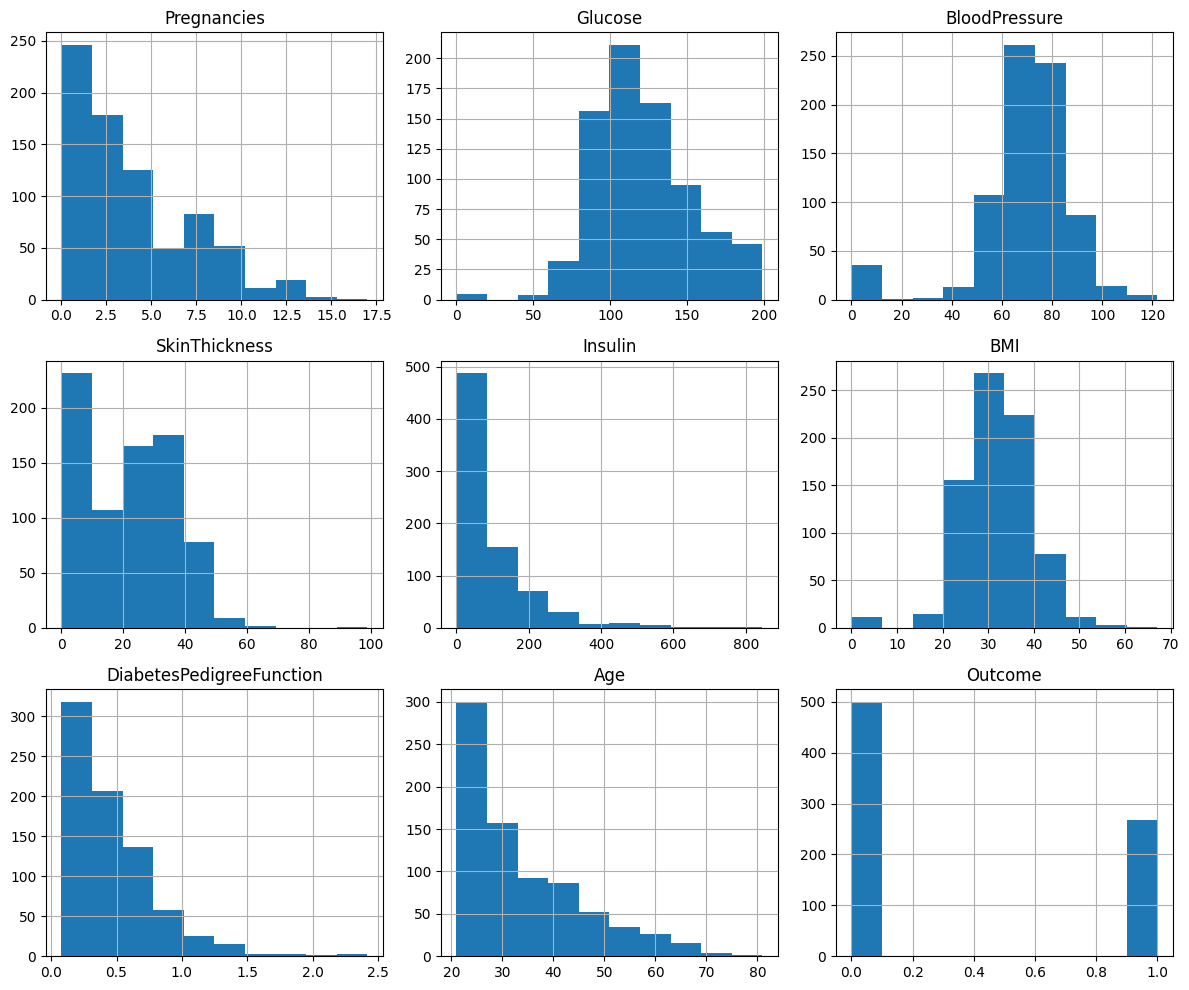

In [6]:
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

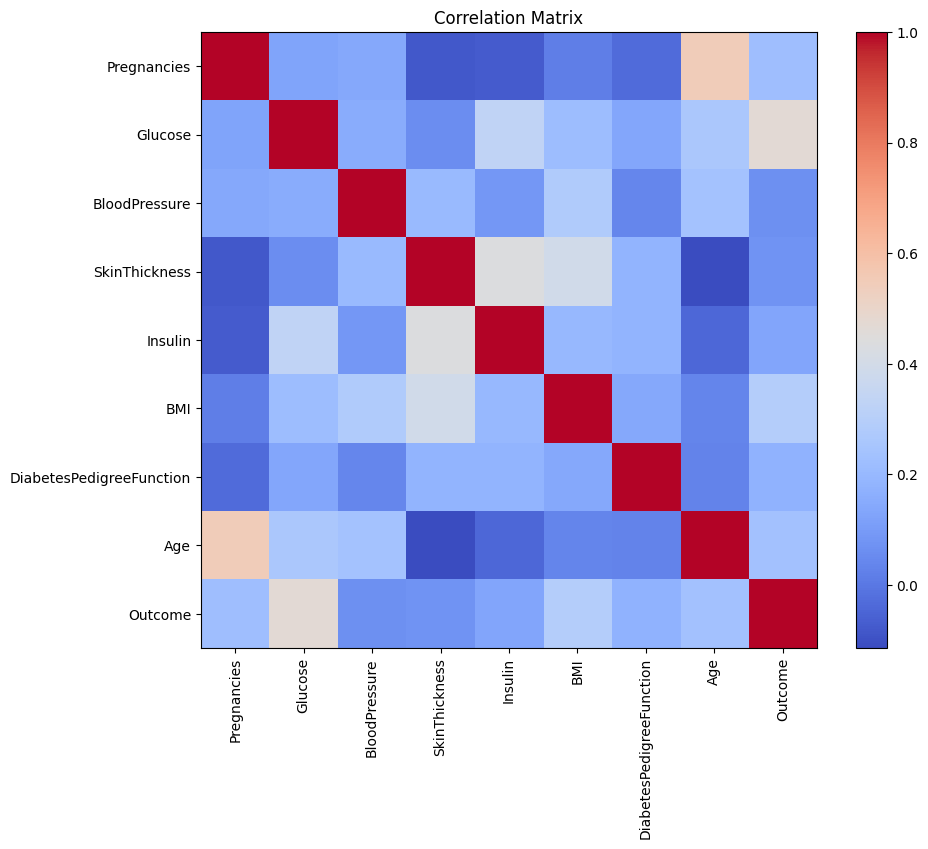

In [7]:
# Correlation matrix
corr_matrix = df.corr()

# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap="coolwarm")
plt.colorbar()
plt.xticks(np.arange(len(df.columns)), df.columns, rotation=90)
plt.yticks(np.arange(len(df.columns)), df.columns)
plt.title("Correlation Matrix")
plt.show()

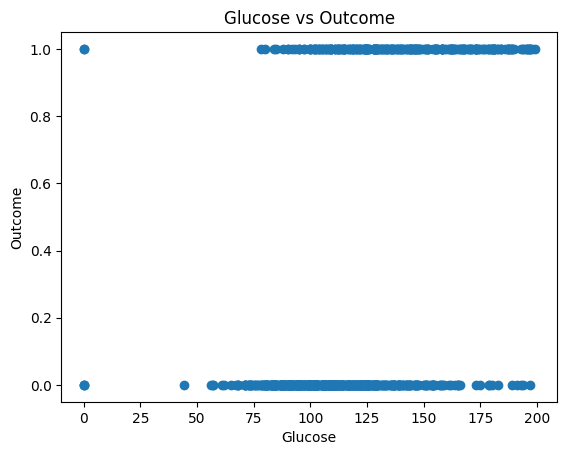

In [8]:
plt.scatter(df["Glucose"], df["Outcome"])
plt.xlabel("Glucose")
plt.ylabel("Outcome")
plt.title("Glucose vs Outcome")
plt.show()

In [9]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [10]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [12]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_precision = precision_score(y_test, logreg_pred)
logreg_recall = recall_score(y_test, logreg_pred)
logreg_f1 = f1_score(y_test, logreg_pred)
logreg_r2 = r2_score(y_test, logreg_pred)
print("Logistic Regression:")
print("Accuracy:", logreg_accuracy)
print("Precision:", logreg_precision)
print("Recall:", logreg_recall)
print("F1-score:", logreg_f1)
print("R2 Score:", logreg_r2)

Logistic Regression:
Accuracy: 0.7532467532467533
Precision: 0.6491228070175439
Recall: 0.6727272727272727
F1-score: 0.6607142857142858
R2 Score: -0.074747474747475


In [13]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)
print("\nDecision Tree:")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1-score:", dt_f1)
print("R2 Score:", dt_r2)


Decision Tree:
Accuracy: 0.7597402597402597
Precision: 0.65
Recall: 0.7090909090909091
F1-score: 0.6782608695652174
R2 Score: -0.046464646464646764


In [14]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
print("\nRandom Forest:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-score:", rf_f1)
print("R2 Score:", rf_r2)


Random Forest:
Accuracy: 0.7597402597402597
Precision: 0.6666666666666666
Recall: 0.6545454545454545
F1-score: 0.6605504587155963
R2 Score: -0.046464646464646764


In [15]:
# Confusion Matrix
cm = confusion_matrix(y_test, rf_pred)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[81 18]
 [19 36]]


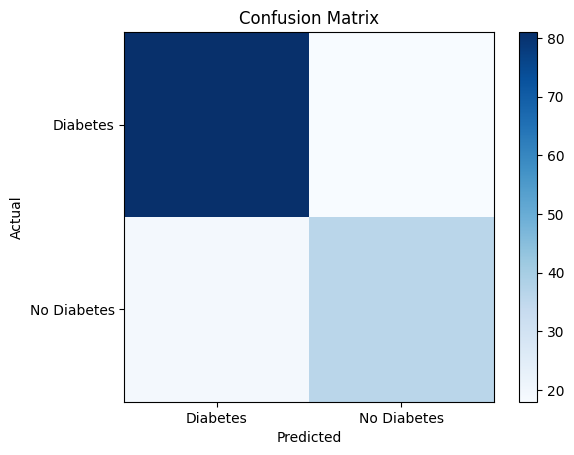

In [16]:
# Visualize the Confusion Matrix
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=[0, 1], labels=['Diabetes','No Diabetes'])
plt.yticks(ticks=[0, 1], labels=['Diabetes','No Diabetes'])
plt.show()

In [17]:
X = df.drop('Outcome', axis=1)

In [18]:
k = 2
centroids, distortion = kmeans(X.values, k)
labels, _ = vq(X.values, centroids)

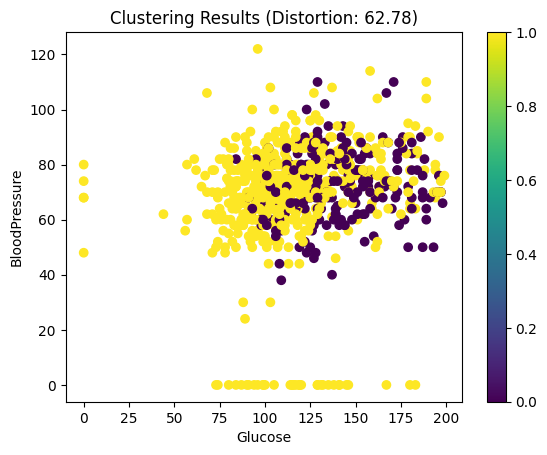

In [19]:
plt.scatter(X.iloc[:, 1], X.iloc[:, 2], c=labels)
plt.xlabel("Glucose")
plt.ylabel("BloodPressure")
plt.colorbar()
plt.title(f"Clustering Results (Distortion: {distortion:.2f})")
plt.show()